In [1]:
import numpy as np

# 1. Dataset

Dataset previmanete marcado enfocado en detección de productos de supermercado
- train 1000
- val 300
- test 13

Usamos la data de roboflow

In [ ]:
# descomprimimos y guardamos en nueva ruta
!mkdir -p "/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset"
!unzip "/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/bbox-retail.v4-tiled.yolov11.zip" -d "/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset"

Archive:  /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/bbox-retail.v4-tiled.yolov11.zip
  inflating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/README.roboflow.txt  
   creating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid
   creating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid/images
  inflating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid/images/test_68_jpg.rf.6b8a9e55181abba57527218d977339dc.jpg  
  inflating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid/images/test_357_jpg.rf.7b70baded4e94d040aada82c0efccced.jpg  
  inflating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid/images/test_27_jpg.rf.4a63ea573642396c341379b0ae98b79c.jpg  
  inflating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid/images/test_282_jpg.rf.90f53f4a678f3573642a969c02526faf.jpg  
  inflating: /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/valid/images/test_42_jpg.rf.

In [ ]:
# descargamos ultralytics para usar Yolo
#!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/3c/b5/fcbe13e483beaf8f9c40243d3a413c60e0cc3f7b98775078ac9a1bf5cd2f/ultralytics-8.3.199-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.23.0 from https://files.pythonhosted.org/packages/93/fb/9af1082bec870188c42a1c239839915b74a5099c392389ff04215dcee812/numpy-2.3.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.3 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib>=3.3.0 from https://files.pythonhosted.org/packages/8c/af/30ddefe19ca67eebd70047dabf50f899eaff6f3c5e6a1a7edaecaf63f794/matplotlib-3.10.6-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/85/68/3da40142e7c21e9b1d4e7ddd6c58738feb013203e6e4b803d62cdd9eb96b/opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata
  Obtaining dependency i

# 2. YOLO

Ya que usaremos nuestro propio dataset, tenemos que afinar el modelo

In [2]:
from ultralytics import YOLO

In [ ]:
# primero probamos con el modelo nano
# este modelo ya está entrenado para la detección de objetos,
# pero nosotros lo enfocaremos en detección de productos en góndolas
model = YOLO('yolo11n.pt')

# afinamos
resultado = model.train(data='/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/data.yaml', # pasamos .yaml porque así lo pide la documentación y le permite orientarse a YOLO sobre nuestra estrucutra
                        epochs = 25, # no necesita tantas porque solo es un ajuste a nuestros datos | Antes fue 10
                        imgsz = 640, # tamaño que pide yolo
                        plots = True,) # para guardar gráficas de métricas en la carpeta runs                       

# genera el modelo .pt en la carpeta raíz

New https://pypi.org/project/ultralytics/8.3.218 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.199 🚀 Python-3.11.6 torch-2.8.0 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64,

In [5]:
model = YOLO('yolo11n.pt')

Usaremos el modelo afinado previamente

In [3]:
# aquí solo cargamos el modelo ya afinado
modelo_afinado = YOLO('/Users/johar/Desktop/Desarrollo/proyecto_dpd/yolo11n.pt')

In [8]:
# probamos con la data de prueba
imagenes_prueba = model('/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images')

# verificamos resultados agarrando algún resultado 
# producto de la predicción
i = np.random.randint(len(imagenes_prueba))
imagenes_prueba[i].show() # mostramos imagen y bounding box


image 1/200 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_108_jpg.rf.1396f9ef755d1368c883dd0b72d196e3.jpg: 640x640 (no detections), 69.7ms
image 2/200 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_108_jpg.rf.66dd43ac2dd491fc4f9bc12bde4d27b2.jpg: 640x640 1 bottle, 1 refrigerator, 58.6ms
image 3/200 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_108_jpg.rf.8d859b017e233b931db11f18fda4b095.jpg: 640x640 (no detections), 52.6ms
image 4/200 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_108_jpg.rf.ab6c06d7a52872a3d1cbe47928eda0d7.jpg: 640x640 1 refrigerator, 58.9ms
image 5/200 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_10_jpg.rf.09d4f35e109bb8328dae6080ee31d534.jpg: 640x640 (no detections), 62.4ms
image 6/200 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_10_jpg.rf.367bab5733b1dc5c92cd69384c6fa704.jpg: 640x640 2 books, 

# 3. Conteo

Ahora ya tenemos un modelo afinado el cual usaremos para contar los objetos

In [9]:
imagen_prueba = '/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_241_jpg.rf.a4c41cff658ac81f442baae6969bb3bf.jpg'
conteo_test1 = model(imagen_prueba)


image 1/1 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/dataset/test/images/test_241_jpg.rf.a4c41cff658ac81f442baae6969bb3bf.jpg: 640x640 4 bottles, 2 refrigerators, 70.0ms
Speed: 3.6ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
# revisamos el conteo de esa imagen
conteo_test1[0]

# contiene los boxes detectados

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [11]:
# revisamos las cajas
conteo_test1[0].boxes

# es 0 porque solo estamos haciendo conteo
# así que manejamos una clase

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([72., 39., 39., 72., 39., 39.])
conf: tensor([0.5712, 0.5046, 0.4948, 0.4608, 0.3221, 0.2547])
data: tensor([[3.4845e-01, 5.4641e-01, 4.1412e+02, 4.1544e+02, 5.7115e-01, 7.2000e+01],
        [1.9707e+02, 2.4168e+02, 2.3625e+02, 3.1372e+02, 5.0459e-01, 3.9000e+01],
        [1.8471e+01, 7.8777e+01, 6.0095e+01, 1.6396e+02, 4.9483e-01, 3.9000e+01],
        [1.1911e+02, 0.0000e+00, 4.1600e+02, 4.1164e+02, 4.6078e-01, 7.2000e+01],
        [5.4749e+01, 7.7100e+01, 1.0421e+02, 1.6308e+02, 3.2209e-01, 3.9000e+01],
        [2.3548e+02, 2.3993e+02, 2.7765e+02, 3.1123e+02, 2.5471e-01, 3.9000e+01]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([6, 6])
xywh: tensor([[207.2339, 207.9914, 413.7709, 414.8900],
        [216.6580, 277.7013,  39.1855,  72.0362],
        [ 39.2829, 121.3680,  41.6245,  85.1819],
        [267.5556, 205.8220, 296.8887, 411.6440],
        [ 79.4805, 120.0910,  49.4639,  85.9828],
      

hay boxes con muy baja probabilidad (0.27) que son detectados

no nos interesan

In [12]:
# cantidad de boxes
len(conteo_test1[0].boxes)

6

con ese valor ya tendríamos el conteo, pero sería un conteo "sucio"

es decir, debemos eliminar lo que tienen baja probabilidad de confianza

In [14]:
# vemos un box en específico
conteo_test1[0].boxes[2]

"""
cls: La categoría del objeto (0 por tener solo uno)
conf: Probabilidad de que el objeto detectado sea de esa categoría
data: Coordenadas del bounding box + conf + cls
"""

'\ncls: La categoría del objeto (0 por tener solo uno)\nconf: Probabilidad de que el objeto detectado sea de esa categoría\ndata: Coordenadas del bounding box + conf + cls\n'

## Umbral de confianza

No todos los boxes son correctos, por eso definiremos un umbral de confianza. 

Es decir, solo nos quedaremos con boxes con alta probabilidad de detección

In [15]:
UMBRAL = 0.4 # limite inferior de probabilidad aceptada
boxes = []

for box in conteo_test1[0].boxes:
    if box.conf > UMBRAL:
        boxes.append(box)

In [16]:
# Usaremos Counter para realizar el conteo (como si tuvieramos multiclase)
from collections import Counter

clases_detectadas = []
for box in boxes:
    clases_detectadas.append(int(box.cls))

# conteo es un diccionario
conteos = Counter(clases_detectadas)

print(conteos)

Counter({72: 2, 39: 2})


In [17]:
modelo_afinado.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# 4. Visualizar resultados


Conteos:
refrigerator: 2
bottle: 2


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

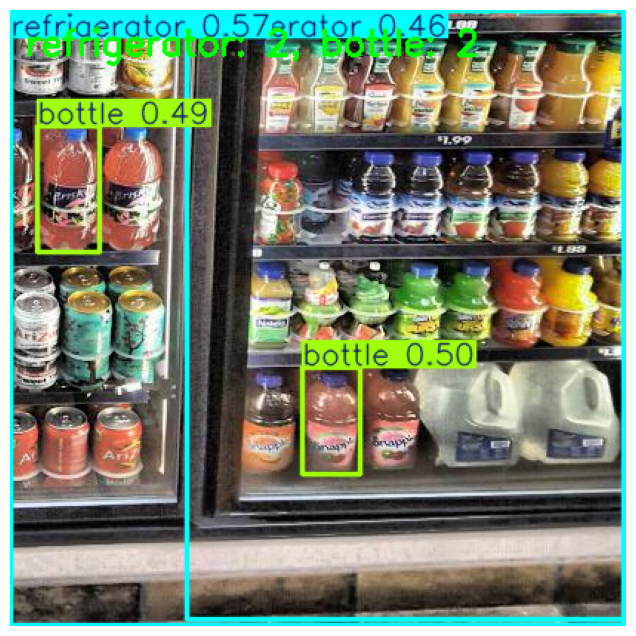

In [18]:
import cv2 # OpenCV
import matplotlib.pyplot as plt

# Mapear categoría de objeto a nombres e imprimir conteos
nombres = model.names
print("\nConteos:")
for cls_id, num in conteos.items():
    print(f"{nombres[cls_id]}: {num}")


# Extraer imagen con los bounding boxes > UMBRAL_CONF
p = conteo_test1[0] # Predicción
mascara = p.boxes.conf > UMBRAL
p.boxes = p.boxes[mascara]
img_bboxes = p.plot() # Imagen con los bounding boxes filtrados

# Añadir anotación mostrando los conteos (esquina superior izquierda)
anotacion = ", ".join([f"{nombres[c]}: {n}" for c, n in conteos.items()])
cv2.putText(img_bboxes, anotacion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (0, 255, 0), 2)

# Convertir imagen de BGR a RGB
img_bboxes_rgb = cv2.cvtColor(img_bboxes, cv2.COLOR_BGR2RGB)

# Y mostrarla
plt.figure(figsize=(12, 8))
plt.imshow(img_bboxes_rgb)
plt.axis("off")


Conteos:
refrigerator: 2
bottle: 2


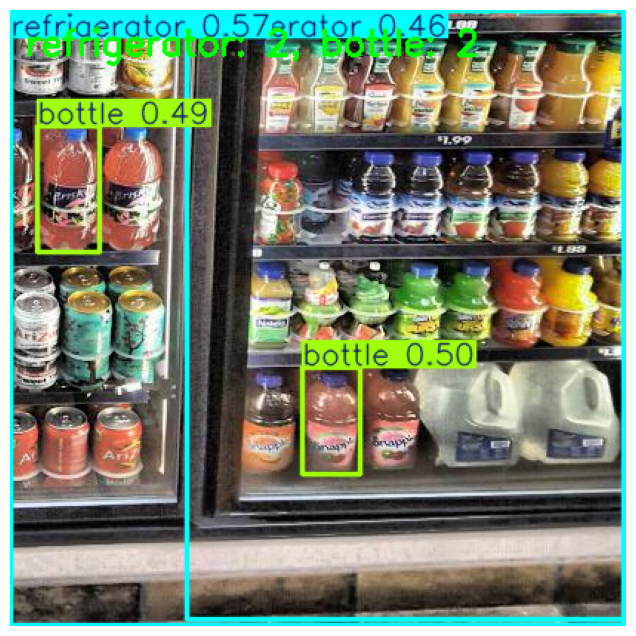

Imagen guardada en "salida_conteo.jpg"


In [19]:
import cv2
import matplotlib.pyplot as plt

# Mapear categoría de objeto a nombres e imprimir conteos
nombres = model.names
print("\nConteos:")
for cls_id, num in conteos.items():
    print(f"{nombres[cls_id]}: {num}")

# Extraer imagen con los bounding boxes > UMBRAL
p = conteo_test1[0]
mascara = p.boxes.conf > UMBRAL
p.boxes = p.boxes[mascara]

# Si no hay cajas, avisar y salir
if len(p.boxes) == 0:
    print("No hay detecciones por encima del umbral.")
else:
    img_bboxes = p.plot()  # ndarray BGR

    # Añadir la anotación con los conteos
    anotacion = ", ".join([f"{nombres[c]}: {n}" for c, n in conteos.items()])
    cv2.putText(img_bboxes, anotacion, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Convertir BGR->RGB para matplotlib
    img_bboxes_rgb = cv2.cvtColor(img_bboxes, cv2.COLOR_BGR2RGB)

    # Mostrar con matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(img_bboxes_rgb)
    _ = plt.axis("off")   # evita que imprima límites
    plt.show()            # <-- fuerza el render en scripts

    # (Opcional) guardar al disco por si no abre ventana
    cv2.imwrite("salida_conteo.jpg", img_bboxes)
    print('Imagen guardada en "salida_conteo.jpg"')


image 1/1 /Users/johar/Desktop/Desarrollo/proyecto_dpd/data/cadena_frio/Captura de pantalla 2025-10-24 a la(s) 9.15.54 p. m..png: 640x320 29 bottles, 2 refrigerators, 35.2ms
Speed: 1.3ms preprocess, 35.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 320)

Conteos:
bottle: 29
refrigerator: 2


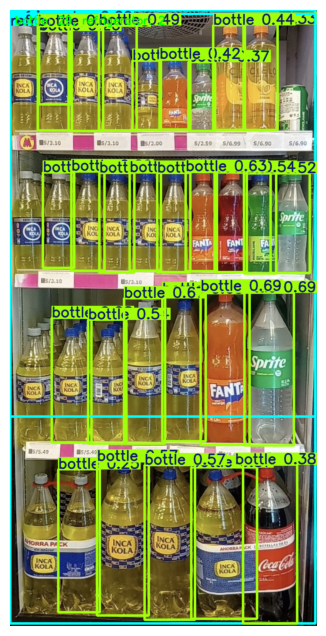

Imagen guardada como "salida_conteo_nueva_imagen.jpg"


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from ultralytics import YOLO

# Cargar el modelo afinado (debe estar previamente entrenado)
modelo_afinado = YOLO('/Users/johar/Desktop/Desarrollo/proyecto_dpd/1_yolo/yolo11n.pt')

# 1. Proporciona la ruta de la nueva imagen
nueva_imagen = '/Users/johar/Desktop/Desarrollo/proyecto_dpd/data/cadena_frio/Captura de pantalla 2025-10-24 a la(s) 9.15.54 p. m..png'  

# 2. Realizar predicción sobre la nueva imagen
predicciones = modelo_afinado(nueva_imagen)

# 3. Filtrar las predicciones según el umbral de confianza (e.g., 0.4)
UMBRAL = 0.2
boxes = []
for box in predicciones[0].boxes:
    if box.conf > UMBRAL:
        boxes.append(box)

# 4. Realizar el conteo de los objetos detectados
clases_detectadas = [int(box.cls) for box in boxes]
conteos = Counter(clases_detectadas)

# 5. Mostrar los resultados
nombres = modelo_afinado.names  # Obtener nombres de las clases

# Imprimir conteos
print("\nConteos:")
for cls_id, num in conteos.items():
    print(f"{nombres[cls_id]}: {num}")

# 6. Visualizar los resultados sobre la imagen
# Filtrar las cajas por el umbral
mascara = predicciones[0].boxes.conf > UMBRAL
predicciones[0].boxes = predicciones[0].boxes[mascara]
img_bboxes = predicciones[0].plot()  # Imagen con los bounding boxes filtrados

# Añadir anotación con los conteos
anotacion = ", ".join([f"{nombres[c]}: {n}" for c, n in conteos.items()])
cv2.putText(img_bboxes, anotacion, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
            0.8, (0, 255, 0), 2)

# Convertir imagen de BGR a RGB para mostrar con matplotlib
img_bboxes_rgb = cv2.cvtColor(img_bboxes, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.figure(figsize=(12, 8))
plt.imshow(img_bboxes_rgb)
plt.axis("off")  # Evitar que se muestren los límites de la imagen
plt.show()

# (Opcional) Guardar la imagen con los bounding boxes
cv2.imwrite("salida_conteo_nueva_imagen.jpg", img_bboxes)
print('Imagen guardada como "salida_conteo_nueva_imagen.jpg"')